In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [3]:
image_width = 180
image_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (image_width, image_height),
    batch_size = 32,
    validation_split = False) 
# validation split it is used when we want to split train data, and validation data from a single folder. 
# We already have so we made False if we want to split we can make it True and give the subset as training or validation.

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size =(image_width, image_height),
    batch_size = 32,
    shuffle = True,
    validation_split = False)

Found 351 files belonging to 36 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size = (image_width, image_height),
    batch_size = 32,
    shuffle = True,
    validation_split = False)

Found 359 files belonging to 36 classes.


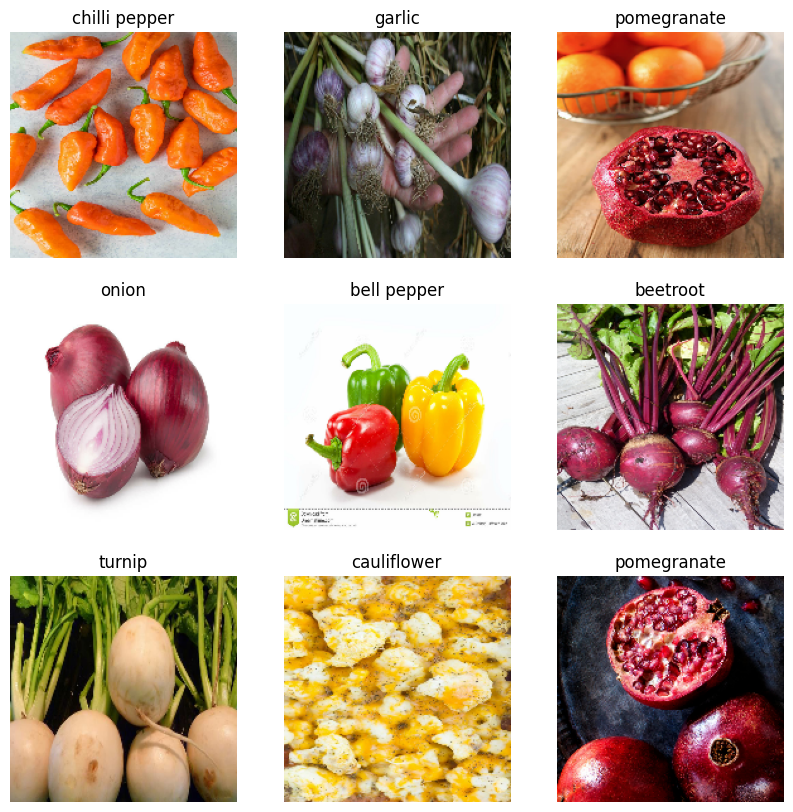

In [16]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')



In [ ]:
model = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
epochs_size = 25
history = model.fit(
    data_train,
    validation_data = data_val,
    epochs = epochs_size
)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 250ms/step - accuracy: 0.0835 - loss: 3.4211 - val_accuracy: 0.3276 - val_loss: 2.4950
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.3271 - loss: 2.4069 - val_accuracy: 0.6011 - val_loss: 1.4121
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.5297 - loss: 1.6559 - val_accuracy: 0.7692 - val_loss: 0.8717
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - accuracy: 0.7274 - loss: 0.9691 - val_accuracy: 0.8661 - val_loss: 0.6930
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.8552 - loss: 0.5185 - val_accuracy: 0.8889 - val_loss: 0.6046
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.9143 - loss: 0.3210 - val_accuracy: 0.9373 - val_loss: 0.4601
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 278ms/step - accuracy: 0.9361 - loss: 0.2628 - val_accuracy: 0.9373 - val_loss: 0.4279
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 284ms/step - accuracy: 0.9583 - loss: 0.1932 - val_accu

Text(0.5, 1.0, 'Training and Validation Loss')

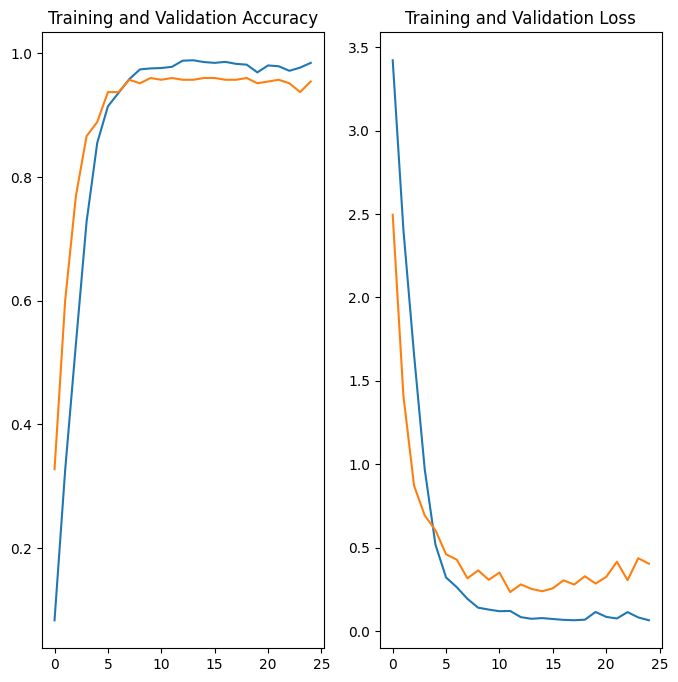

In [25]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

In [31]:
image = 'Apple.jpg'
image = keras.utils.load_img(image, target_size=(image_width, image_height))
img_array = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_array, 0)


In [32]:
predict = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [33]:
score = tf.nn.softmax(predict)

In [ ]:
print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(data_cat[np.argmax(score)], 100 * np.max(score)))

this image most likely belongs to apple with a 100.00 percent confidence.
